# CIFAR-10 Image Classification Project

### Introduction
### This notebook loads CIFAR-10 images and trains a convolutional neural network (CNN) on them. It then evaluates the model on test images from CIFAR-10 and demonstrates its performance. Finally, the trained model is tested on 6 external sample images, showing predictions and confidence to assess generalization beyond the original dataset.

### Step 1. Import Libraries

In [2]:
#================================================================================
# Step 1. Import Libraries
# ================================================================================

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

### Step 2. Load CIFAR-10 Dataset

In [3]:
print("=" * 80)
print("Step 2. LOADING CIFAR-10 DATASET")
print("=" * 80)

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")

# Class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

Step 2. LOADING CIFAR-10 DATASET
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 16s 0us/step
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


### Step 3. Explorative Data Analysis (EDA)


Step 3. DATA EXPLORATION
Sample images saved as 'cifar10_samples.png'

Class Distribution in Training Set:
  airplane: 5000 images
  automobile: 5000 images
  bird: 5000 images
  cat: 5000 images
  deer: 5000 images
  dog: 5000 images
  frog: 5000 images
  horse: 5000 images
  ship: 5000 images
  truck: 5000 images


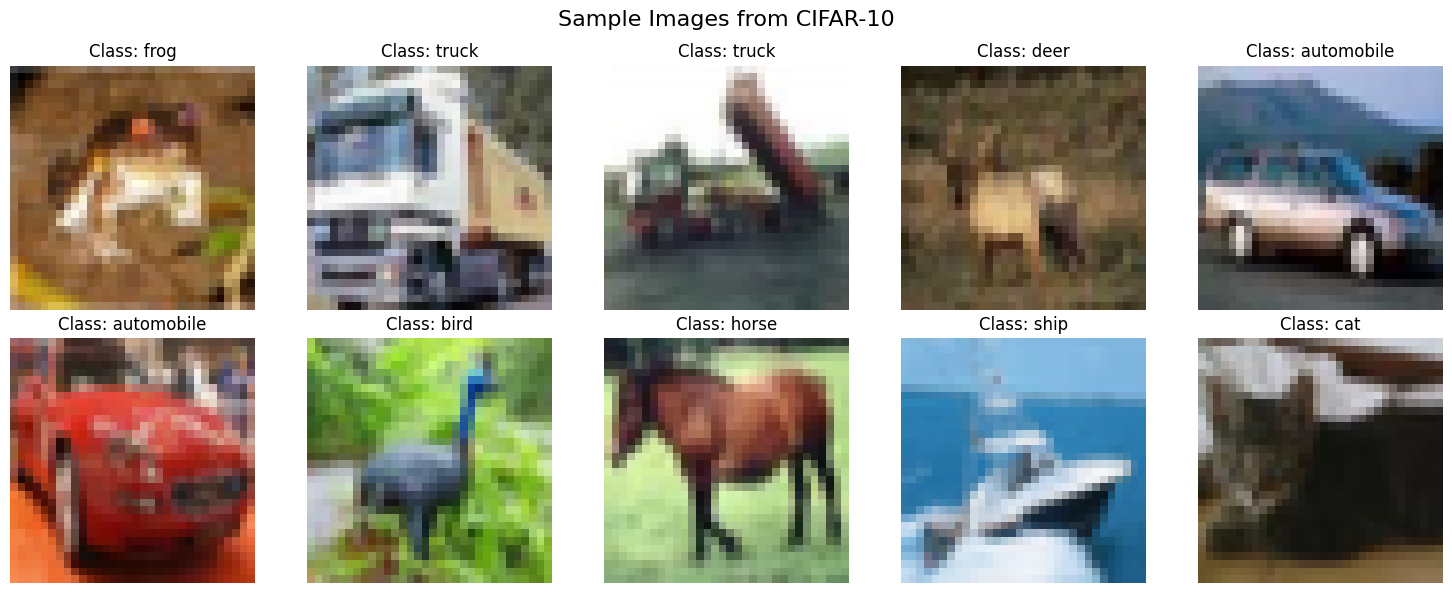

In [4]:
print("\n" + "=" * 80)
print("Step 3. DATA EXPLORATION")
print("=" * 80)

# Display sample images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Sample Images from CIFAR-10', fontsize=16)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i])
    ax.set_title(f"Class: {class_names[y_train[i][0]]}")
    ax.axis('off')

plt.tight_layout()
plt.savefig('cifar10_samples.png', dpi=150, bbox_inches='tight')
print("Sample images saved as 'cifar10_samples.png'")

# Class distribution
unique, counts = np.unique(y_train, return_counts=True)
print("\nClass Distribution in Training Set:")
for class_idx, count in zip(unique, counts):
    print(f"  {class_names[class_idx]}: {count} images")

### Step 4. Data Preprocessing

In [5]:
print("\n" + "=" * 80)
print("Step 4. DATA PREPROCESSING")
print("=" * 80)

# Normalize pixel values to [0, 1]
X_train_normalized = X_train.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0

print(f"Original data range: [{X_train.min()}, {X_train.max()}]")
print(f"Normalized data range: [{X_train_normalized.min()}, {X_train_normalized.max()}]")

# One-hot encode labels
y_train_categorical = to_categorical(y_train, 10)
y_test_categorical = to_categorical(y_test, 10)

print(f"\nOriginal label shape: {y_train.shape}")
print(f"One-hot encoded label shape: {y_train_categorical.shape}")
print(f"Example - Original: {y_train[0]}, One-hot: {y_train_categorical[0]}")


Step 4. DATA PREPROCESSING
Original data range: [0, 255]
Normalized data range: [0.0, 1.0]

Original label shape: (50000, 1)
One-hot encoded label shape: (50000, 10)
Example - Original: [6], One-hot: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


### Step 5. Model Creation

In [35]:
print("\n" + "=" * 80)
print("Step 5: BUILDING CNN MODEL")
print("=" * 80)

model = models.Sequential([
    # Input Layer
    layers.Input(shape=(32, 32, 3)),

    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Third Convolutional Block
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Dense Layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\nModel Architecture:")
model.summary()


Step 5: BUILDING CNN MODEL

Model Architecture:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 552,874 (2.11 MB)

 Trainable params: 551,722 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

### Step 6. Model Training

In [7]:
print("\n" + "=" * 80)
print("Step 6. TRAINING MODEL")
print("=" * 80)

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-7,
    verbose=1
)

# Train model
history = model.fit(
    X_train_normalized, y_train_categorical,
    batch_size=64,
    epochs=50,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)



Step 6. TRAINING MODEL
Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.3548 - loss: 2.0411 - val_accuracy: 0.5200 - val_loss: 1.3453 - learning_rate: 0.0010
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.5932 - loss: 1.1428 - val_accuracy: 0.6560 - val_loss: 0.9992 - learning_rate: 0.0010
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.6770 - loss: 0.9303 - val_accuracy: 0.5916 - val_loss: 1.2896 - learning_rate: 0.0010
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7122 - loss: 0.8243 - val_accuracy: 0.7220 - val_loss: 0.8236 - learning_rate: 0.0010
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7464 - loss: 0.7377 - val_accuracy: 0.7704 - val_loss: 0.6656 - learning_rate: 0.0010
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7685 - loss: 0.6629 - val_accuracy: 0.7147 - val_loss: 0.8538 - learning_rate: 0.0010
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - ac

### Step 7. Training Visualization


Step 7. VISUALIZING TRAINING HISTORY
Training history saved as 'training_history.png'


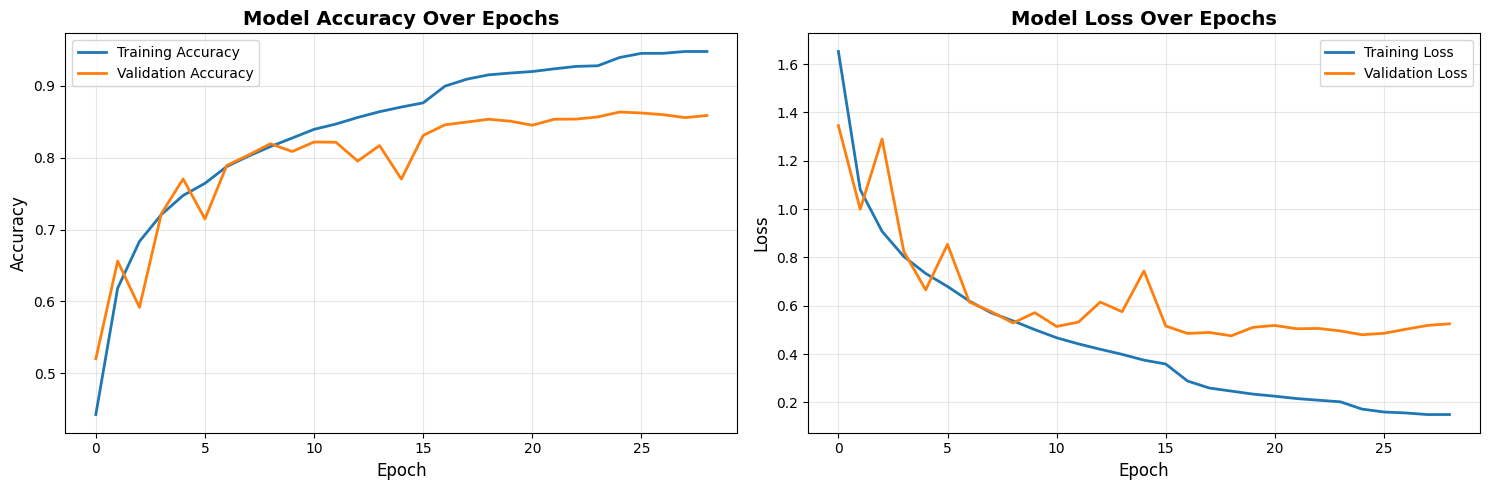

In [8]:
print("\n" + "=" * 80)
print("Step 7. VISUALIZING TRAINING HISTORY")
print("=" * 80)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy plot
ax1.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
ax1.set_title('Model Accuracy Over Epochs', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Loss plot
ax2.plot(history.history['loss'], label='Training Loss', linewidth=2)
ax2.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
ax2.set_title('Model Loss Over Epochs', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('training_history.png', dpi=150, bbox_inches='tight')
print("Training history saved as 'training_history.png'")

### Step 8. Model Evaluation

In [10]:
print("\n" + "=" * 80)
print("Step 8. EVALUATING MODEL ON TEST SET")
print("=" * 80)

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test_normalized, y_test_categorical, verbose=0)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Make predictions
y_pred_probs = model.predict(X_test_normalized, verbose=0)
y_pred = np.argmax(y_pred_probs, axis=1)


Step 8. EVALUATING MODEL ON TEST SET

Test Loss: 0.5186
Test Accuracy: 0.8462 (84.62%)


### Step 9. Classification Report

In [11]:
print("\n" + "=" * 80)
print("Step 9. CLASSIFICATION REPORT")
print("=" * 80)

print("\n" + classification_report(
    y_test, y_pred,
    target_names=class_names,
    digits=4
))


Step 9. CLASSIFICATION REPORT

              precision    recall  f1-score   support

    airplane     0.8581    0.8590    0.8586      1000
  automobile     0.9428    0.9070    0.9246      1000
        bird     0.8337    0.7520    0.7907      1000
         cat     0.7007    0.7140    0.7073      1000
        deer     0.8051    0.8510    0.8274      1000
         dog     0.7705    0.7620    0.7662      1000
        frog     0.8905    0.8860    0.8882      1000
       horse     0.8877    0.8850    0.8863      1000
        ship     0.8736    0.9400    0.9056      1000
       truck     0.9042    0.9060    0.9051      1000

    accuracy                         0.8462     10000
   macro avg     0.8467    0.8462    0.8460     10000
weighted avg     0.8467    0.8462    0.8460     10000



### Step 10. Confusion Matrix

 Step 10. CONFUSION MATRIX
Confusion matrix saved as 'confusion_matrix.png'


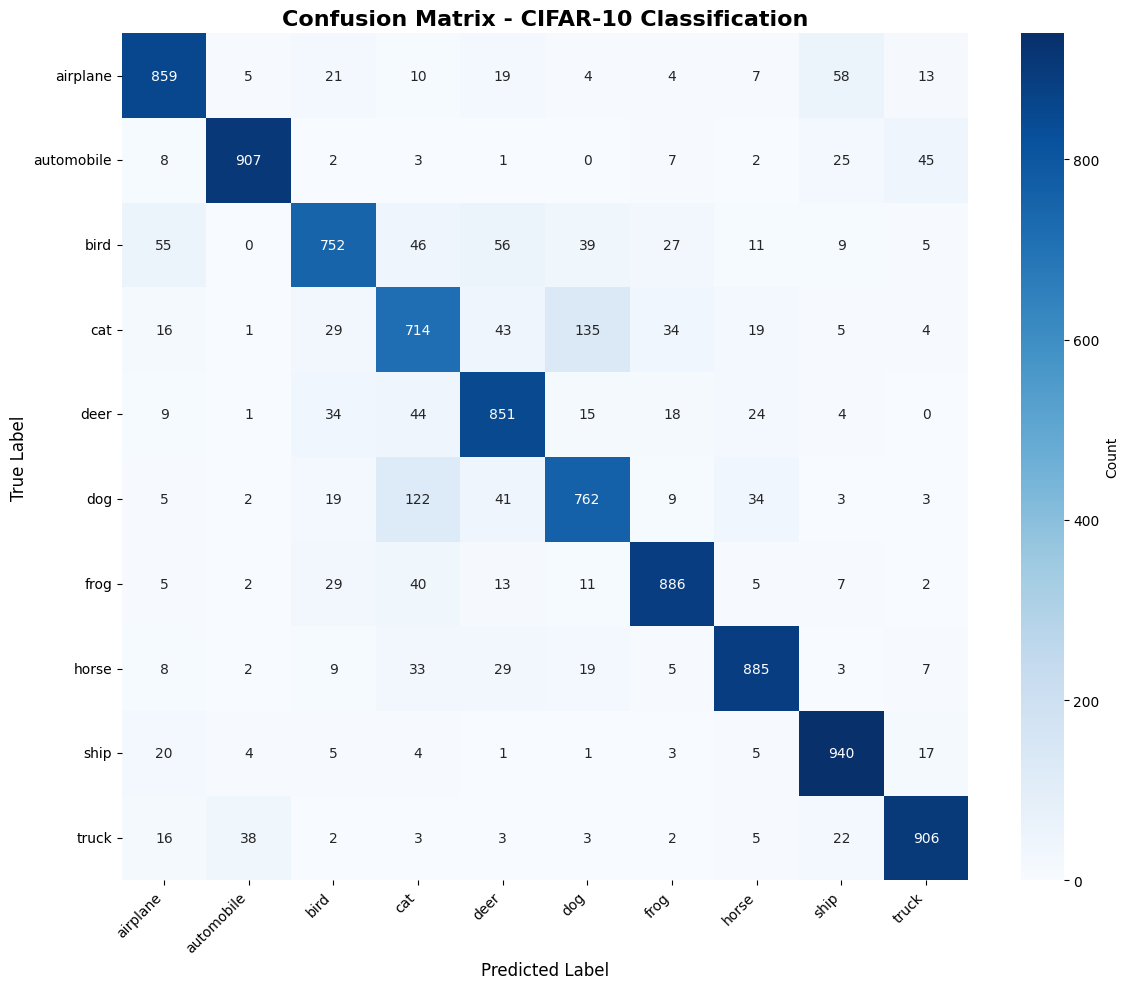

In [12]:
print("=" * 80)
print(" Step 10. CONFUSION MATRIX")
print("=" * 80)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - CIFAR-10 Classification', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=150, bbox_inches='tight')
print("Confusion matrix saved as 'confusion_matrix.png'")

### Step 11. Prediction Examples 1


Step 11. SAMPLE PREDICTIONS 1
Sample predictions saved as 'sample_predictions.png'


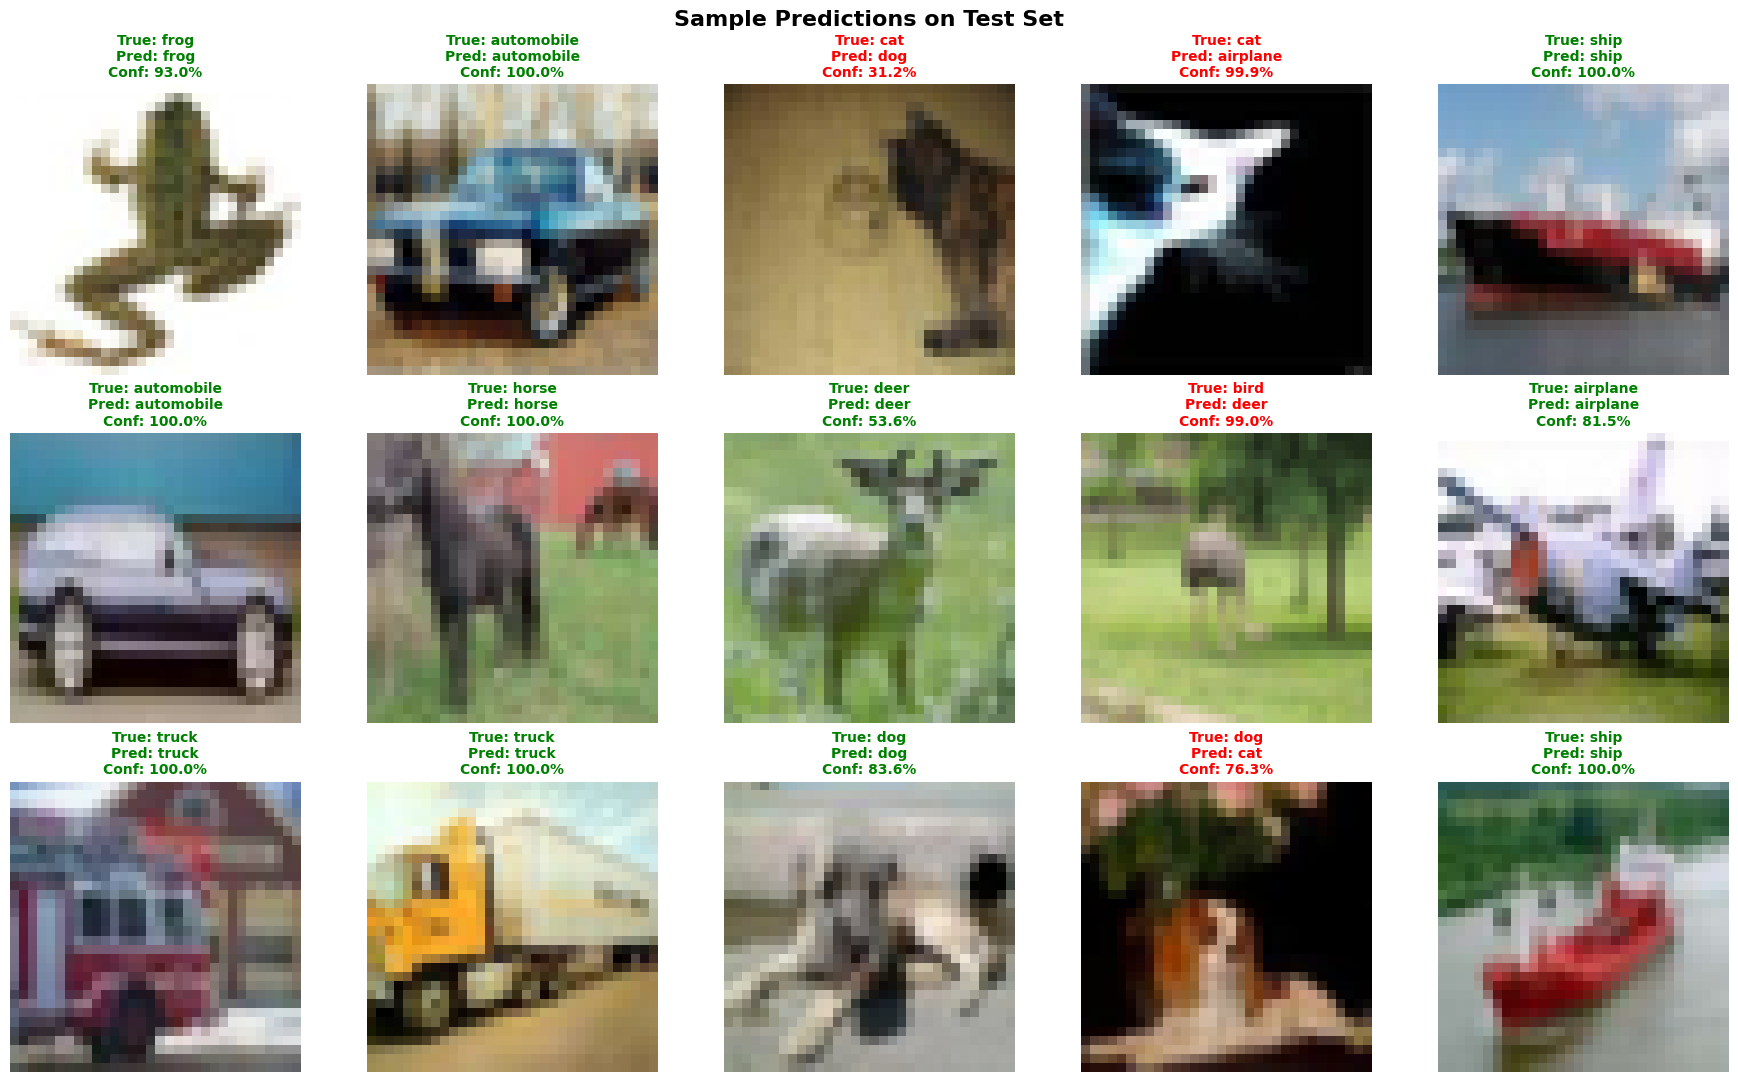

In [13]:
print("\n" + "=" * 80)
print("Step 11. SAMPLE PREDICTIONS 1")
print("=" * 80)

# Display sample predictions
fig, axes = plt.subplots(3, 5, figsize=(18, 11))
fig.suptitle('Sample Predictions on Test Set', fontsize=16, fontweight='bold')

indices = np.random.choice(len(X_test), 15, replace=False)

for i, (ax, idx) in enumerate(zip(axes.flat, indices)):
    ax.imshow(X_test[idx])

    true_label = class_names[y_test[idx][0]]
    pred_label = class_names[y_pred[idx]]
    confidence = y_pred_probs[idx][y_pred[idx]] * 100

    color = 'green' if true_label == pred_label else 'red'
    ax.set_title(f"True: {true_label}\nPred: {pred_label}\nConf: {confidence:.1f}%",
                 fontsize=10, color=color, fontweight='bold')
    ax.axis('off')

plt.tight_layout()
plt.savefig('sample_predictions.png', dpi=150, bbox_inches='tight')
print("Sample predictions saved as 'sample_predictions.png'")

### Step 11.1 Prediction Examples 2

In [32]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
# Download external URL images & preprocess
import requests # download images from URLs
from PIL import Image  # open and manipulate images
import matplotlib.pyplot as plt
import numpy as np  # numerical arrays and preprocessing

In [16]:
# External URL images resize, normalize, convert to NumPy, display, for model feed
def load_image_from_url(url):
    response = requests.get(url, stream=True)
    img = Image.open(response.raw).convert('RGB')  # Convert to RGB
    return img


In [17]:
# External Images' URLs
url_list = ["https://i.gr-assets.com/images/S/compressed.photo.goodreads.com/hostedimages/1548745177i/26984287.jpg",
            "https://images.drivespark.com/webp/img/2013/07/16-1373972669-1962-chevrolet-impala-coupe.jpg",
            "https://images.drivespark.com/webp/img/2013/07/16-1373972766-1967-volkswagen-beetle-coupe.jpg",
            "https://images.drivespark.com/webp/img/2013/07/16-1373972694-1962-jaguar-xke-coupe.jpg",
            "https://cdn.artphotolimited.com/images/5ca5bf82ce46dc3d348294d2/300x300/toucan.jpg",
            "https://t1p.de/ag0kl"
]

images = [load_image_from_url(url) for url in url_list]



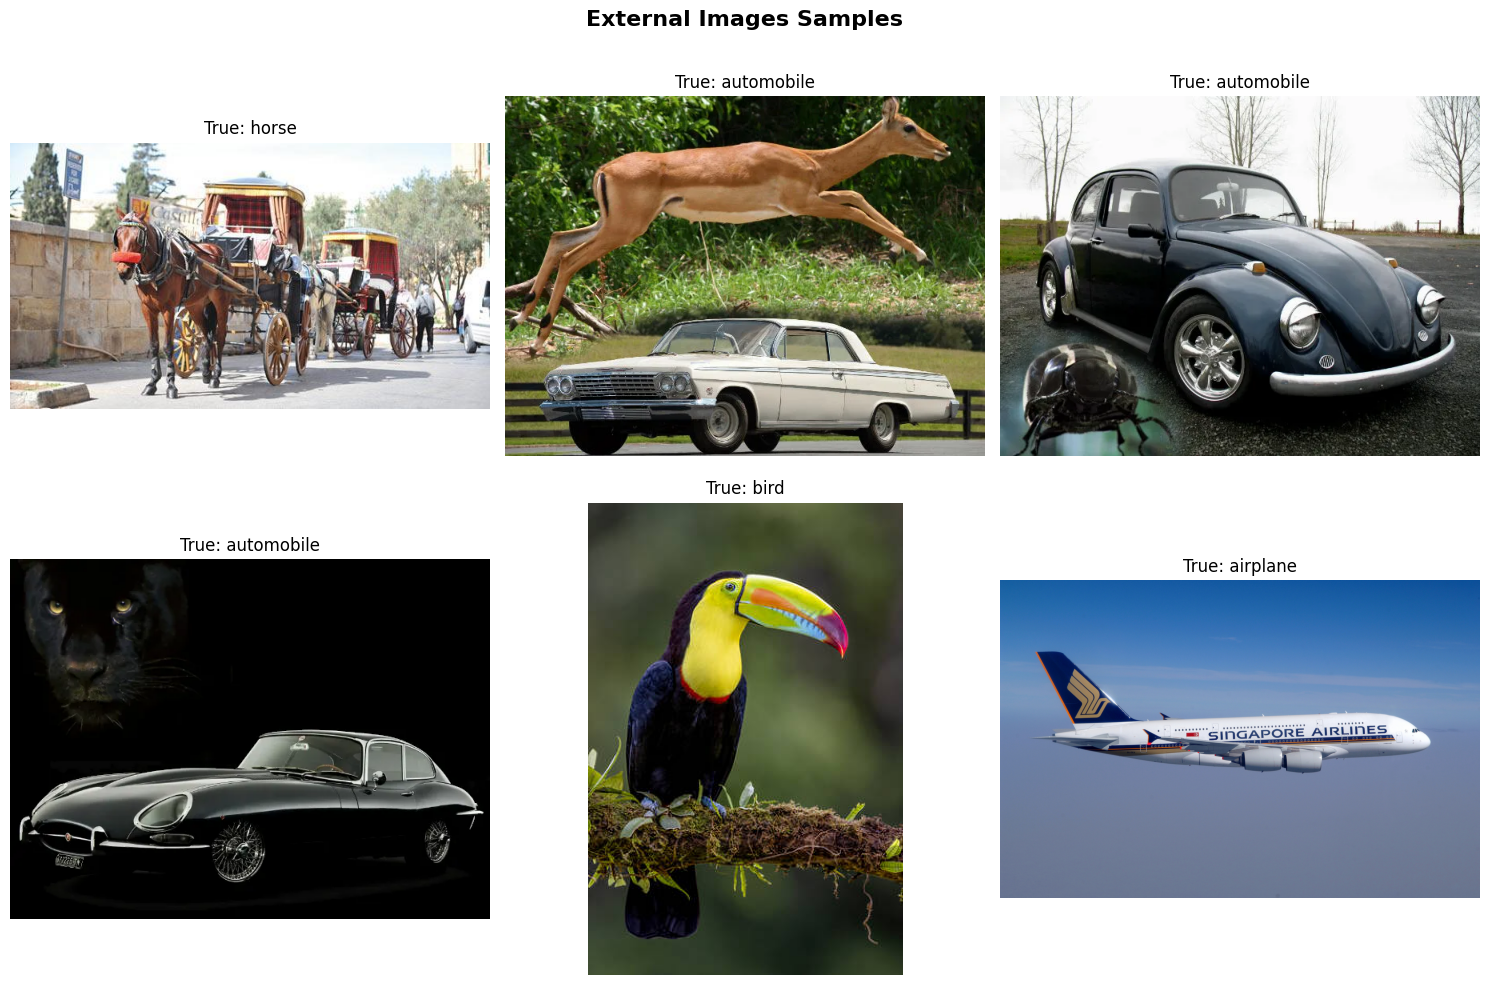

In [21]:
# True labels corresponding to each image
true_labels = ['horse', 'automobile', 'automobile', 'automobile', 'bird', 'airplane']

# Plot all images (6 in total)
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('External Images Samples', fontsize=16, fontweight='bold')
axs = axs.flatten()

for i, (img, label) in enumerate(zip(images,true_labels)):
    axs[i].imshow(img)
    axs[i].axis('off')
    axs[i].set_title(f"True: {label}")

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 948ms/step
Sample predictions saved as 'external_sample_predictions.png'


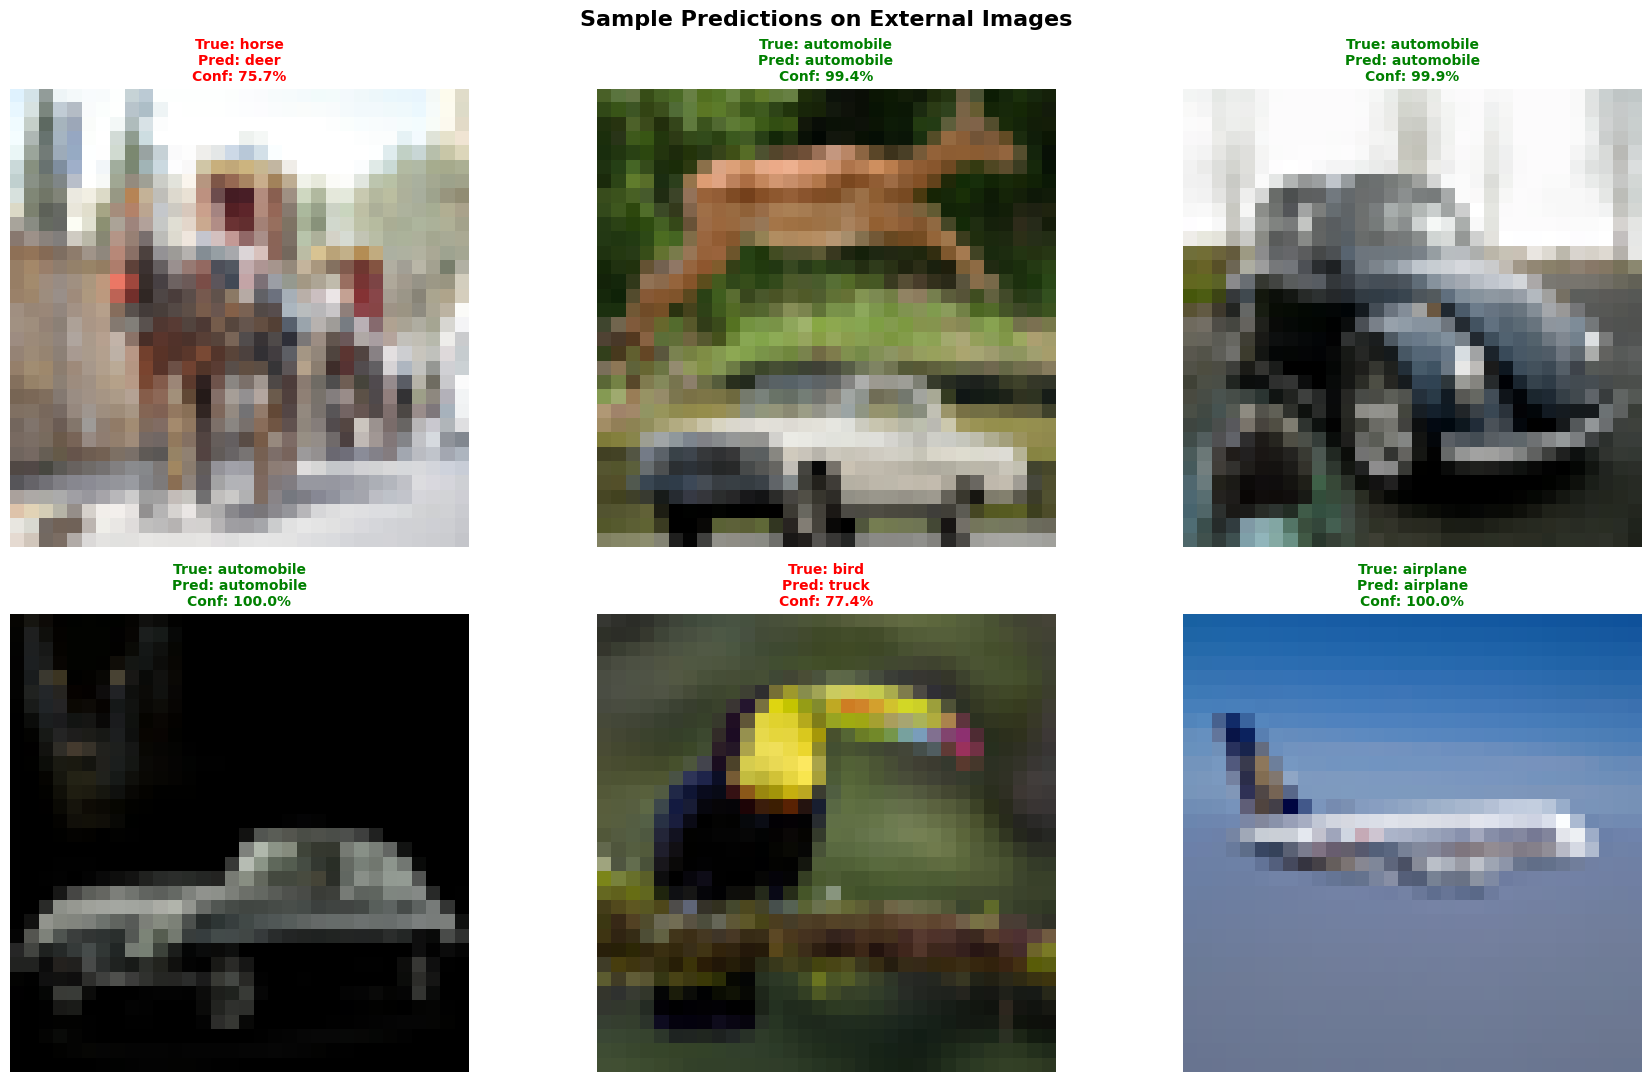

In [22]:
# Labeling order of true labels (indices) for external tested images
# : horse=7, automobile=1, bird=2, aeroplane=0

true_label_indices = [7, 1, 1, 1, 2, 0]  #  true label indices order
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical  # need for y_test processing

# Preprocess images for prediction
def preprocess_images(image_list):
    # Convert PIL images to numpy arrays normalized to [0,1]
    processed = []
    for img in image_list:
        img = img.resize((32, 32)) # resize for CIFAR-10 model
        img_array = np.array(img) / 255.0 # normalize
        processed.append(img_array)
    return np.array(processed)

# Preprocess URL images
all_images = preprocess_images(images)

# Predict labels
y_pred_probs = model.predict(all_images)               # Shape (num_images, 10)
y_pred = np.argmax(y_pred_probs, axis=1)               # Predicted class indices

# CIFAR-10 classes
class_names = ['airplane', 'automobile', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Display images with predictions
fig, axes = plt.subplots(2, 3, figsize=(18, 11))
fig.suptitle('Sample Predictions on External Images', fontsize=16, fontweight='bold')
axes = axes.flatten()

for i, ax in enumerate(axes[:len(all_images)]):
    ax.imshow(all_images[i])

    true_label = class_names[true_label_indices[i]]   # True label for this image
    pred_label = class_names[y_pred[i]]               # Predicted label
    confidence = y_pred_probs[i][y_pred[i]] * 100     # Confidence score

    color = 'green' if true_label == pred_label else 'red'
    ax.set_title(f"True: {true_label}\nPred: {pred_label}\nConf: {confidence:.1f}%",
                 fontsize=10, color=color, fontweight='bold')
    ax.axis('off')

plt.tight_layout()
plt.savefig('external_sample_predictions.png', dpi=150, bbox_inches='tight')
print("Sample predictions saved as 'external_sample_predictions.png'")
plt.show()


### Step 12. Save Model

In [25]:
print("\n" + "=" * 80)
print("Step 12. SAVING MODEL")
print("=" * 80)

# Save Trained Model
model.save('/content/drive/MyDrive/cifar10_cnn_model.keras')
print("Model saved to Google Drive")


Step 12. SAVING MODEL
Model saved to Google Drive


### FINAL SUMMARY

In [27]:
print("\n" + "=" * 80)
print("PROJECT SUMMARY")
print("=" * 80)
print(f"\n✓ Dataset: CIFAR-10")
print(f"✓ Training samples: {len(X_train)}")
print(f"✓ Test samples: {len(X_test)}")
print(f"✓ Number of classes: 10")
print(f"✓ Image size: 32x32x3")
print(f"\n✓ Model: CNN with 3 convolutional blocks")
print(f"✓ Total parameters: {model.count_params():,}")
print(f"\n✓ Final Test Accuracy: {test_accuracy*100:.2f}%")
print(f"✓ Final Test Loss: {test_loss:.4f}")
print("\n" + "=" * 80)
print("PROJECT COMPLETED SUCCESSFULLY!")
print("=" * 80)


PROJECT SUMMARY

✓ Dataset: CIFAR-10
✓ Training samples: 50000
✓ Test samples: 10000
✓ Number of classes: 10
✓ Image size: 32x32x3

✓ Model: CNN with 3 convolutional blocks
✓ Total parameters: 552,874

✓ Final Test Accuracy: 84.62%
✓ Final Test Loss: 0.5186

PROJECT COMPLETED SUCCESSFULLY!


### Further Directions and Improvements

In [33]:
print("\n" + "=" * 80)
print("FURTHER DIRECTIONS & IMPROVEMENTS")
print("=" * 80)

print("\n MODEL ENHANCEMENTS:")
print("  1. Data Augmentation")
print("     - Expected improvement: +2-5% accuracy")
print("  2. Transfer Learning: Use ResNet50, EfficientNet")
print("     - Expected improvement: +5-10% accuracy")
print("     - Expected improvement: +1-3% accuracy")

print("\n HYPERPARAMETER TUNING:")
print("  1. Learning rate scheduling")
print("  2. Different optimizers")
print("  3. Adjust dropout rates and regularization")

print("\n" + "=" * 80)


FURTHER DIRECTIONS & IMPROVEMENTS

 MODEL ENHANCEMENTS:
  1. Data Augmentation
     - Expected improvement: +2-5% accuracy
  2. Transfer Learning: Use ResNet50, EfficientNet
     - Expected improvement: +5-10% accuracy
     - Expected improvement: +1-3% accuracy

 HYPERPARAMETER TUNING:
  1. Learning rate scheduling
  2. Different optimizers
  3. Adjust dropout rates and regularization

